In [1]:
import APEX as ap
import pyccl as ccl
import numpy as np

cosmo = ccl.Cosmology(
    Omega_c=0.261,
    Omega_b=0.049,
    h=0.677,
    n_s=0.9665,
    sigma8=0.8102,
    transfer_function="bbks",
    matter_power_spectrum="halofit")


In [2]:
chosen_map = '../CIB-Project/cls_desi_lrgs_x_cib.fits'
chosen_tracer = 'DESI_LRG__'

In [3]:
gdwsp = ap.GalaxyDensityTracerWorkspace(
    sacc_file=chosen_map,
    tracer_name_root=chosen_tracer,
    max_index=3,
    cosmology=cosmo
)

cibwsp = ap.CIBIntensityTracerWorkspace(
    flux_fits_file="../CIB-Project/filtered_snu_planck.fits",
    cosmology=cosmo,
    tracer_name_root="CIBLenz__",
    single_index=3
)

tracer_combos = [(f'{chosen_tracer}0', f'{chosen_tracer}0'),
                 (f'{chosen_tracer}1', f'{chosen_tracer}1'),
                 (f'{chosen_tracer}2', f'{chosen_tracer}2'),
                 (f'{chosen_tracer}3', f'{chosen_tracer}3'),

                 ('CIBLenz__3', f'{chosen_tracer}0'),
               
                 ('CIBLenz__3', f'{chosen_tracer}1'),
                 
                 ('CIBLenz__3', f'{chosen_tracer}2'),
              
                 ('CIBLenz__3', f'{chosen_tracer}3')
                 ]

s = ap.SaccWorkspace(chosen_map, tracer_combinations=tracer_combos, reverse_order=True)

s.define_alias('cib_857GHz', 'CIBLenz__3')

mmodel = ap.MaleubreModel(
    Tracer1Workspace=cibwsp,
    Tracer2Workspace=gdwsp,
    tracer_combos=tracer_combos,
    sacc_workspace=s,
    cosmology=cosmo,
    logged_N=True,
    min_ell=100,
    max_ell=1000,
    k_max=0.3
)



{'CIBLenz__3': 'cib_857GHz'}


In [27]:
mcmc = ap.MCMCWorkspace(
    sacc_file='/home/nathand/Documents/AstroCode/CIB-Project/NEW-hsc_red_x_cib(857).fits',
    model=mmodel,
    likelihood_function='log_likelihood_function',

)

params = ['b_g0', 'b_g1', 'b_g2', 'b_g3',
          'N_gg0', 'N_gg1', 'N_gg2', 'N_gg3',
          'A_gg0', 'A_gg1', 'A_gg2', 'A_gg3',
          'N_gnu0', 'N_gnu1', 'N_gnu2', 'N_gnu3',
          'A_gnu0', 'A_gnu1', 'A_gnu2', 'A_gnu3',
          'bpsfr0', 'bpsfr1', 'bpsfr2', 'bpsfr3']

mcmc.set_param_priors(
    params=params,
    priors=[
        (0.75, 5), (0.75, 5), (0.75, 5), (0.75, 5), 
        (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), 
        (-100, 100), (-100, 100), (-100, 100), (-100, 100),
        (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), 
        (-100, 100), (-100, 100), (-100, 100), (-100, 100),
        (-3, 3), (-3, 3), (-3, 3), (-3, 3),
    ]
)

mcmc.set_param_references(
    params=params,
    references=[
        1.1, 1.1, 1.1, 1.1, 
        np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), 
        7, 7, 7, 7,
        np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), 
        7, 7, 7, 7,
        0.5, 0.5, 0.5, 0.5,
    ]
)

mcmc.set_param_proposals(
    params=params,
    proposals=[
        0.1, 0.1, 0.1, 0.1, 
        np.log10(1e-9), np.log10(1e-9), np.log10(1e-9), np.log10(1e-9),
        1, 1, 1, 1,
        np.log10(1e-9), np.log10(1e-9), np.log10(1e-9), np.log10(1e-9),
        1, 1, 1, 1,
        0.1, 0.1, 0.1, 0.1,
    ]
)

mcmc.set_grouped_params({
    'b_gs': ['b_g0', 'b_g1', 'b_g2', 'b_g3'],
    'N_ggs': ['N_gg0', 'N_gg1', 'N_gg2', 'N_gg3'],
    'A_ggs': ['A_gg0', 'A_gg1', 'A_gg2', 'A_gg3'],
    'N_gnus': ['N_gnu0', 'N_gnu1', 'N_gnu2', 'N_gnu3'],
    'A_gnus': ['A_gnu0', 'A_gnu1', 'A_gnu2', 'A_gnu3'],    
    'bpsfrs': ['bpsfr0', 'bpsfr1', 'bpsfr2', 'bpsfr3']
})

mcmc.MCMC_config(params, sampler_info={'minimize': {'seed':42}})

sampler = mcmc.minimize_run()

[<bound method maleubremodel.log_likelihood_function of <apex.maleubremodel object at 0x7f47fbee3230>>] Initialized external likelihood.
[minimize] *WARNING* This run has been SEEDED with seed 42
[minimize] Initializing
[minimize] Run 1/2 will start from random initial point:
[minimize] {'b_g0': np.float64(1.1), 'b_g1': np.float64(1.1), 'b_g2': np.float64(1.1), 'b_g3': np.float64(1.1), 'N_gg0': np.float64(-8.769551078621726), 'N_gg1': np.float64(-8.769551078621726), 'N_gg2': np.float64(-8.769551078621726), 'N_gg3': np.float64(-8.769551078621726), 'A_gg0': np.float64(7.0), 'A_gg1': np.float64(7.0), 'A_gg2': np.float64(7.0), 'A_gg3': np.float64(7.0), 'N_gnu0': np.float64(-8.769551078621726), 'N_gnu1': np.float64(-8.769551078621726), 'N_gnu2': np.float64(-8.769551078621726), 'N_gnu3': np.float64(-8.769551078621726), 'A_gnu0': np.float64(7.0), 'A_gnu1': np.float64(7.0), 'A_gnu2': np.float64(7.0), 'A_gnu3': np.float64(7.0), 'bpsfr0': np.float64(0.5), 'bpsfr1': np.float64(0.5), 'bpsfr2': np.

{'CIBLenz__3': 'CIBLenz__857'}
[<bound method maleubremodel.log_likelihood_function of <apex.maleubremodel object at 0x7fcaea453d90>>] Initialized external likelihood.
[minimize] *WARNING* This run has been SEEDED with seed 42
[minimize] Initializing
[minimize] Run 1/2 will start from random initial point:
[minimize] {'b_g0': np.float64(1.1), 'N_gg0': np.float64(-8.769551078621726), 'A_gg0': np.float64(7.0), 'N_gnu0': np.float64(-8.769551078621726), 'A_gnu0': np.float64(7.0), 'bpsfr0': np.float64(0.5)}
[minimize] Run 2/2 will start from random initial point:
[minimize] {'b_g0': np.float64(1.1), 'N_gg0': np.float64(-8.769551078621726), 'A_gg0': np.float64(7.0), 'N_gnu0': np.float64(-8.769551078621726), 'A_gnu0': np.float64(7.0), 'bpsfr0': np.float64(0.5)}
[minimize] Starting run 1/2
[minimize] Run 1/2 converged.
[minimize] Starting run 2/2
[minimize] Run 2/2 converged.
[minimize] Finished successfully!
[minimize] -log(posterior) minimized to 174.328
[minimize] Parameter values at minimu

Text(0, 0.5, 'bpsfr0')

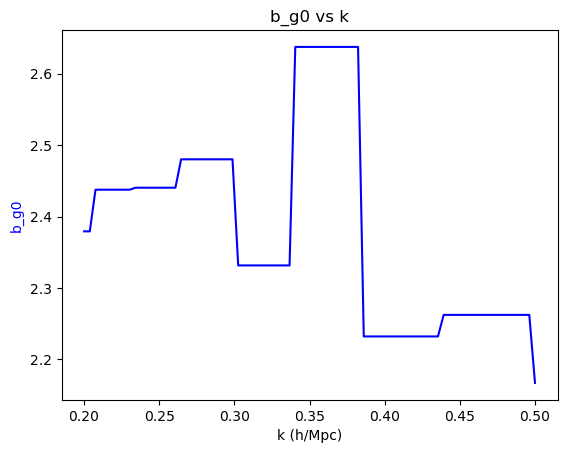

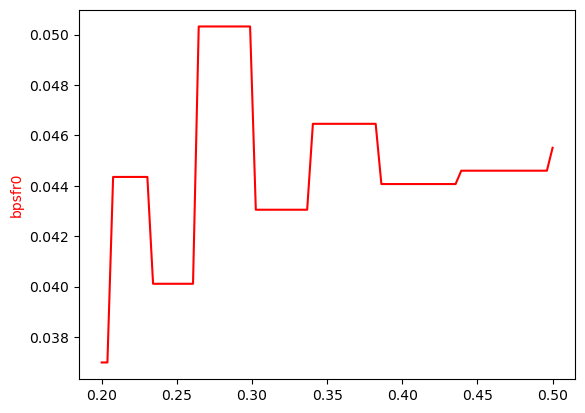

In [6]:


tracer_combos = [(f'{chosen_tracer}1', f'{chosen_tracer}1'),
              
                 ('CIBLenz__3', f'{chosen_tracer}1')
                ]

s = ap.SaccWorkspace(chosen_map, tracer_combinations=tracer_combos, reverse_order=True)

s.define_alias('CIBLenz__857', 'CIBLenz__3')

k = np.linspace(0.20, 0.5, 80)

bgs = []
bpsfrs = []

for i in k:
    mmodel = ap.MaleubreModel(
        Tracer1Workspace=cibwsp,
        Tracer2Workspace=gdwsp,
        tracer_combos=tracer_combos,
        sacc_workspace=s,
        cosmology=cosmo,
        logged_N=True,
        min_ell=100,
        max_ell=1000,
        k_max=i
    )

    mcmc = ap.MCMCWorkspace(
        sacc_file='/home/nathand/Documents/AstroCode/CIB-Project/cls_desi_lrgs_x_cib.fits',
        model=mmodel,
        likelihood_function='log_likelihood_function',

    )
    params = ['b_g0', 'N_gg0', 'A_gg0', 'N_gnu0', 'A_gnu0', 'bpsfr0']

    mcmc.set_param_priors(
        params=params,
        priors=[
            (0.75, 5), 
            (np.log10(1e-15), np.log10(1)), 
            (-100, 100), 
            (np.log10(1e-15), np.log10(1)), 
            (-100, 100), 
            (-3, 3),
        ]
    )

    mcmc.set_param_references(
        params=params,
        references=[
            1.1, 
            np.log10(1.7e-9), 
            7, 
            np.log10(1.7e-9), 
            7, 
            0.5,
        ]
    )

    mcmc.set_param_proposals(
        params=params,
        proposals=[
            0.1, 
            np.log10(1e-9), 
            1, 
            np.log10(1e-9), 
            1, 
            0.1,
        ]
    )

    mcmc.set_grouped_params({
        'b_gs': ['b_g0'],
        'N_ggs': ['N_gg0'],
        'A_ggs': ['A_gg0'],
        'N_gnus': ['N_gnu0'],
        'A_gnus': ['A_gnu0'],    
        'bpsfrs': ['bpsfr0']
    })

    mcmc.MCMC_config(params, sampler_info={'minimize': {'seed':42}})

    sampler = mcmc.minimize_run()

    bgs.append(sampler.products()['minimum']['b_g0'])
    bpsfrs.append(sampler.products()['minimum']['bpsfr0'])

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(k, bgs, label='b_g0', color='blue')
ax1.set_xlabel('k (h/Mpc)')
ax1.set_ylabel('b_g0', color='blue')
ax1.set_title('b_g0 vs k')

fig, ax2 = plt.subplots()
ax2.plot(k, bpsfrs, label='bpsfr0', color='red')
ax2.set_ylabel('bpsfr0', color='red')



In [5]:
print(mcmc.print_config())

MCMC Configuration:
Sacc file: /home/nathand/Documents/AstroCode/CIB-Project/NEW-hsc_x_cib(857).fits
Likelihood function: <bound method MaleubreModel.log_likelihood_function of <APEX.MaleubreModel object at 0x7fcaf8188210>>
Parameters with priors:
b_g0: (0.75, 5)
N_gg0: (np.float64(-15.0), np.float64(0.0))
A_gg0: (-100, 100)
N_gnu0: (np.float64(-15.0), np.float64(0.0))
A_gnu0: (-100, 100)
bpsfr0: (-3, 3)
Parameters with references:
b_g0: 1.1
N_gg0: -8.769551078621726
A_gg0: 7
N_gnu0: -8.769551078621726
A_gnu0: 7
bpsfr0: 0.5
Parameters with proposals:
b_g0: 0.1
N_gg0: -9.0
A_gg0: 1
N_gnu0: -9.0
A_gnu0: 1
bpsfr0: 0.1
Grouped parameters:
('b_gs', {'value': <function <lambda> at 0x7fcaf877a980>, 'derived': False})
('N_ggs', {'value': <function <lambda> at 0x7fcaf877bb00>, 'derived': False})
('A_ggs', {'value': <function <lambda> at 0x7fcaf877a520>, 'derived': False})
('N_gnus', {'value': <function <lambda> at 0x7fcaf8778b80>, 'derived': False})
('A_gnus', {'value': <function <lambda> at 0x

In [1]:

b_gs = [sampler.products()['minimum'][f'b_g{i}'] for i in range(4)]
bpsfrs = [sampler.products()['minimum'][f'bpsfr{i}'] for i in range(4)]



NameError: name 'sampler' is not defined